### Step 1. Importing all important libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the data

In [26]:
train_csv_path = "/content/mnist_train_binary.csv"
train_data = pd.read_csv(train_csv_path)
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Display the sample images

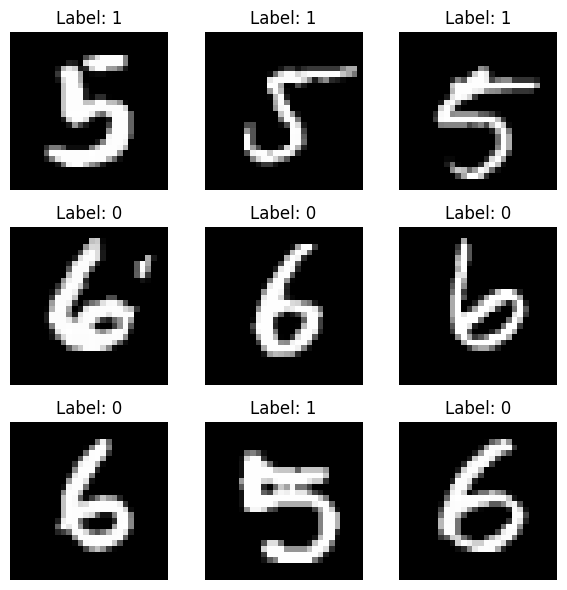

In [27]:
import torch
import csv
y_train = train_data.iloc[:, 0]            # labels
X_train_raw =train_data.iloc[:, 1:]       # pixel values (0–255)
img_size = 28

# Plot
n = 9 # number of elements to show
cols = int(n**0.5)
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols*2, rows*2))
for i in range(n):
    # Access row by integer position and convert to torch tensor
    pixels_tensor = torch.tensor(X_train_raw.iloc[i].values, dtype=torch.float32)
    pixels = pixels_tensor.view(img_size, img_size)  # 784 = 28x28
    label  = int(y_train[i]) # Access label by integer position
    plt.subplot(rows, cols, i+1)
    plt.imshow(pixels.tolist(), cmap="gray")  # convert tensor → list-of-lists
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Task 2

In [15]:
import torch
import torch.nn.functional as F
import torch.nn as nn

In [28]:
#mentioned in HW
in_dim = img_size * img_size
hidden = 100
out_dim = 1

### Defining Sigmoid Fx of my own
def sigmoid_torch(x):
  # σ(z) = 1 / (1 + exp(-z))
    return 1.0 / (1.0 + torch.exp(-x))

### Creates a model class that inherits the nn module
#Input Layer --> Hidden Layer --> Output Layer
# fully-connected network: 784 -> 100 -> 1
class NNModel(nn.Module):
    def __init__(self, in_dim=784, hidden=100, out_dim=1):
        super().__init__()
        self.W1 = nn.Parameter(torch.empty(in_dim, hidden))
        self.W2 = nn.Parameter(torch.empty(hidden, out_dim))
        self._init_params()

    # param initialization eg weight
    def _init_params(self):
        self.W1.data.normal_(mean=0.0)
        self.W2.data.normal_(mean=0.0)
        # enforce strictly non-zero
        self.W1.data[self.W1.data == 0] = 1e-4
        self.W2.data[self.W2.data == 0] = 1e-4

    ## model to define the forward flow
    def forward(self, x):
        ## Sigmoid as Activation Function
        z1= x @self.W1
        print(z1.shape, self.W1.shape)
        a1 = sigmoid_torch(z1)   # hidden layer with my sigmoid as activation function
        z2= a1 @self.W2
        a2 = sigmoid_torch(z2)  # output layer with my customised sigmoid
        return a2


In [29]:
model = NNModel(in_dim=in_dim, hidden=hidden, out_dim=out_dim)


Task 3

### Manual Seed for Randomization

In [30]:
torch.manual_seed(0)

In [31]:
# X_train = X_train_raw[]
if isinstance(X_train_raw, (pd.DataFrame, np.ndarray)):
    X_train_tensor = torch.tensor(X_train_raw.values, dtype=torch.float32)
else:
    X_train_tensor = X_train_raw
print(X_train_tensor[:64].shape)

#Forward pass on first 64 samples, print a^{[2]}
with torch.no_grad():
    a2_first64 = model(X_train_tensor[:64]).view(-1)

print("\nFirst 64 a[2] values:")
for i, v in enumerate(a2_first64.tolist(), start=1):
    print(f"{i}: {v:.4f}")

torch.Size([64, 784])
torch.Size([64, 100]) torch.Size([784, 100])

First 64 a[2] values:
1: 0.8358
2: 0.0002
3: 0.9988
4: 0.9915
5: 0.9038
6: 0.9986
7: 0.8183
8: 0.5770
9: 0.0832
10: 0.0008
11: 0.7292
12: 0.8144
13: 0.0535
14: 0.9375
15: 0.9993
16: 0.3827
17: 0.1221
18: 0.0119
19: 0.6729
20: 0.8425
21: 0.0027
22: 0.0087
23: 0.0020
24: 0.0005
25: 0.0001
26: 0.9713
27: 0.6025
28: 0.0033
29: 0.9631
30: 0.0069
31: 0.7481
32: 0.3812
33: 0.9385
34: 0.2537
35: 0.1153
36: 0.0005
37: 0.9933
38: 0.0001
39: 0.9982
40: 0.9318
41: 0.2745
42: 0.0919
43: 0.1863
44: 0.3833
45: 0.0422
46: 0.3174
47: 0.1424
48: 0.9955
49: 0.9775
50: 0.2059
51: 0.1171
52: 0.2923
53: 0.8115
54: 0.9974
55: 0.0001
56: 0.2649
57: 0.3205
58: 0.7019
59: 0.6254
60: 0.0024
61: 0.2973
62: 0.9981
63: 0.0486
64: 0.6143
